In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [89]:
df = pd.read_csv('../Datasets/Titanic-Dataset.csv')

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
df.shape

(891, 12)

In [92]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [94]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [95]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

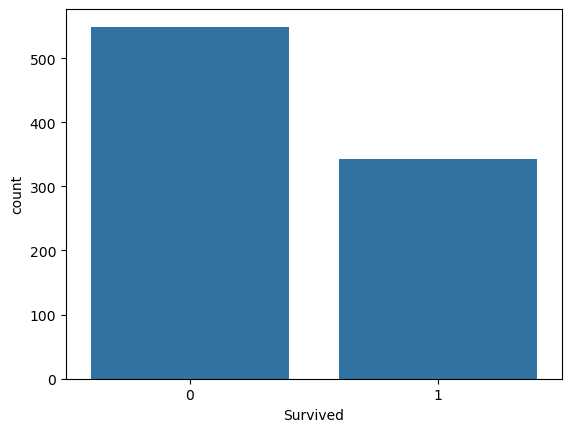

In [96]:
sns.countplot(x='Survived', data=df)

In [97]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [98]:
df['Deck'] = df['Cabin'].str[0]

In [99]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN


In [100]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Deck        687
dtype: int64

In [101]:
df.drop(['Cabin'], axis=1, inplace=True)

In [102]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [103]:
df['Embarked'].isna().sum()

2

In [104]:
df = df[df['Embarked'].notnull()]

In [105]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Deck        687
dtype: int64

In [106]:
median_age  = df.groupby(['Pclass', 'Sex'])['Age'].median()

In [107]:
median_age

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [108]:
def fillage(row):
    if pd.isnull(row['Age']):
        return median_age.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']
        
    

In [109]:
df['Age'] = df.apply(fillage, axis=1)

In [110]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Deck        687
dtype: int64

In [111]:
df['Deck'] = df['Deck'].fillna('U')

In [112]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,U
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,U


In [114]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [115]:
ohetransform = ohe.fit_transform(df[['Sex','Embarked','Deck']])

In [116]:
ohetransform

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
df_concat = pd.concat([df,ohetransform], axis=1)

In [118]:
df_concat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Sex_female,...,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,male,22.0,1,0,7.2500,S,U,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,C,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,U,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,C,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,U,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,U,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,B,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,3,female,21.5,1,2,23.4500,S,U,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,male,26.0,0,0,30.0000,C,C,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df_concat.drop(['Sex','Embarked','Deck'],axis=1, inplace=True)

In [120]:
df_concat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
df_concat.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Deck_A        0
Deck_B        0
Deck_C        0
Deck_D        0
Deck_E        0
Deck_F        0
Deck_G        0
Deck_T        0
Deck_U        0
dtype: int64

In [123]:
X = df_concat.drop(['Survived'], axis=1)
y = df_concat['Survived']

In [124]:
X.shape

(889, 19)

In [125]:
y.shape

(889,)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [129]:
scaler = StandardScaler()

In [130]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
param_grid = {
    'penalty':['l1','l2'],
    'C': np.logspace(-4,4,20),
    'max_iter':[100,250,500,1000],
    'solver':['liblinear','saga']
}

In [141]:
gcv = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, error_score='raise')

In [142]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 250, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='neg_log_loss')

In [143]:
gcv.best_params_

{'C': 0.23357214690901212, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

In [147]:
model = gcv.best_estimator_

In [148]:
y_scores = model.predict_proba(X_test)[:,1]

In [149]:
fpr, tpr, threshold = roc_curve(y_test, y_scores)

In [151]:
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_index]
optimal_threshold

0.37939580928418654

In [158]:
y_pred = (model.predict_proba(X_test)[:,1]>=optimal_threshold).astype('int')

In [159]:
a_score = accuracy_score(y_test, y_pred)
a_score

0.8033707865168539

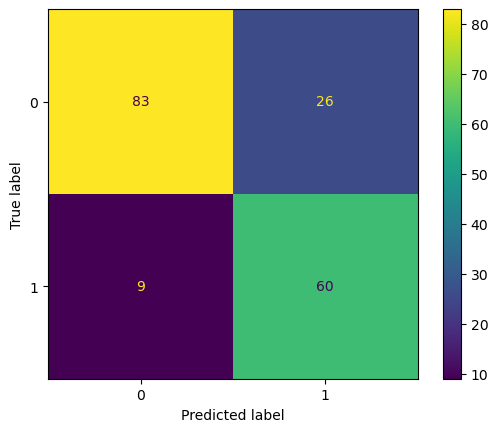

In [160]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [161]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.8155165536497806

In [164]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       109
           1       0.70      0.87      0.77        69

    accuracy                           0.80       178
   macro avg       0.80      0.82      0.80       178
weighted avg       0.82      0.80      0.81       178

